In [1]:
%pip install -U scikit-learn --quiet

Note: you may need to restart the kernel to use updated packages.


## Import dataset

In [2]:
from sklearn.preprocessing import MinMaxScaler
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
ddos_benign = pd.read_csv('dataset/ddos-benign.csv', index_col=0)

In [4]:
ddos_benign.head()

,flow_duration,Header_Length,Protocol Type,Duration,Rate,Srate,Drate,fin_flag_number,syn_flag_number,rst_flag_number,...,Std,Tot size,IAT,Number,Magnitue,Radius,Covariance,Variance,Weight,label
0,0.000000,0.0,1.0,64.0,167772.160000,167772.160000,0.0,0.0,0.0,0.0,...,0.000000,42.0,8.312482e+07,9.5,9.165151,0.000000,0.000000,0.0,141.55,1
1,0.000000,54.0,6.0,64.0,0.942194,0.942194,0.0,1.0,0.0,1.0,...,0.000000,54.0,8.334376e+07,9.5,10.392305,0.000000,0.000000,0.0,141.55,1
2,0.446886,116470.0,6.0,247.0,251.715336,251.715336,0.0,0.0,0.0,0.0,...,567.765593,2922.0,1.665228e+08,13.5,72.582270,804.470733,325090.502844,1.0,244.60,0
3,56.306826,3789470.2,6.0,97.4,66.324101,66.324101,0.0,0.0,0.0,0.0,...,372.412696,1224.4,1.037412e-02,5.5,50.823738,526.671085,232030.356168,0.6,38.50,0
4,0.000000,0.0,1.0,64.0,1.954291,1.954291,0.0,0.0,0.0,0.0,...,0.000000,42.0,8.315071e+07,9.5,9.165151,0.000000,0.000000,0.0,141.55,1


In [5]:
X = ddos_benign.drop('label', inplace=False, axis=1)
# Label will be 1 if benign, 0 if not.
y = ddos_benign['label']

In [6]:
X.head()

,flow_duration,Header_Length,Protocol Type,Duration,Rate,Srate,Drate,fin_flag_number,syn_flag_number,rst_flag_number,...,AVG,Std,Tot size,IAT,Number,Magnitue,Radius,Covariance,Variance,Weight
0,0.000000,0.0,1.0,64.0,167772.160000,167772.160000,0.0,0.0,0.0,0.0,...,42.000000,0.000000,42.0,8.312482e+07,9.5,9.165151,0.000000,0.000000,0.0,141.55
1,0.000000,54.0,6.0,64.0,0.942194,0.942194,0.0,1.0,0.0,1.0,...,54.000000,0.000000,54.0,8.334376e+07,9.5,10.392305,0.000000,0.000000,0.0,141.55
2,0.446886,116470.0,6.0,247.0,251.715336,251.715336,0.0,0.0,0.0,0.0,...,2635.498331,567.765593,2922.0,1.665228e+08,13.5,72.582270,804.470733,325090.502844,1.0,244.60
3,56.306826,3789470.2,6.0,97.4,66.324101,66.324101,0.0,0.0,0.0,0.0,...,1298.064127,372.412696,1224.4,1.037412e-02,5.5,50.823738,526.671085,232030.356168,0.6,38.50
4,0.000000,0.0,1.0,64.0,1.954291,1.954291,0.0,0.0,0.0,0.0,...,42.000000,0.000000,42.0,8.315071e+07,9.5,9.165151,0.000000,0.000000,0.0,141.55


In [7]:
y.head()

0    1
1    1
2    0
3    0
4    1
Name: label, dtype: int64

## Cross Validation

In [8]:
from sklearn.model_selection import train_test_split

# Split into training and temporary set (70% training, 30% temp)
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=4, stratify=y)

# Split the temporary set into testing and validation sets (50% testing, 50% validation). Final is 70%-15%-15%
X_test, X_val, y_test, y_val = train_test_split(X_temp, y_temp, test_size=0.5, random_state=4, stratify=y_temp)

## Normalization

Min-Max Scaling: Scales the values so they fall within a defined range (0 and 1). The formula is:
$$\frac{x - \min(x)}{\max(x) - \min(x)}$$ 

Adjust the numerical values in the dataset to a common scale without distorting differences in the ranges of values.

This is going to be implemented after splitting the data to prevent bias.

In [9]:
scaler = MinMaxScaler()
# Normalize and return a dataframe
X_train = pd.DataFrame(scaler.fit_transform(X_train), columns=X_train.columns)
X_val = pd.DataFrame(scaler.fit_transform(X_val), columns=X_val.columns)
X_test = pd.DataFrame(scaler.fit_transform(X_test), columns=X_test.columns)

In [10]:
dataframes = [X_train, X_val, X_test, y_train, y_val,y_test]

# Prints the shape of each dataframe
for df in dataframes:
    print(df.shape)

(1610000, 46)
(345000, 46)
(345000, 46)
(1610000,)
(345000,)
(345000,)


In [11]:
X_train.head()

,flow_duration,Header_Length,Protocol Type,Duration,Rate,Srate,Drate,fin_flag_number,syn_flag_number,rst_flag_number,...,AVG,Std,Tot size,IAT,Number,Magnitue,Radius,Covariance,Variance,Weight
0,0.003891,5.104095e-03,0.127660,0.224706,0.000002,0.000002,0.0,0.0,0.0,0.0,...,0.012410,0.014715,0.012126,1.212703e-10,0.321429,0.070772,0.014715,2.238126e-04,0.90,0.153941
1,0.000000,7.622664e-08,0.022340,0.250980,0.000006,0.000006,0.0,0.0,0.0,0.0,...,0.000012,0.000056,0.000024,4.991681e-01,0.607143,0.000110,0.000056,3.473671e-08,0.08,0.576970
2,0.001292,1.585974e-01,0.127660,0.250980,0.000013,0.000013,0.0,0.0,0.0,0.0,...,0.108707,0.000000,0.108707,9.174011e-12,0.321429,0.294638,0.000000,0.000000e+00,0.00,0.153941
3,0.003258,4.075638e-01,0.151064,0.250980,0.000014,0.000014,0.0,0.0,0.0,0.0,...,0.092898,0.033572,0.087497,8.324860e-12,0.321429,0.267884,0.033572,1.660924e-03,0.60,0.153941
4,0.001562,3.711733e-03,0.174468,0.536471,0.000005,0.000005,0.0,0.0,0.0,0.0,...,0.033196,0.057856,0.045964,3.356287e-11,0.321429,0.124850,0.057856,4.728864e-03,0.90,0.153941


## Models Implementation

### Logistic Regression - Raw

Accuracy: 99.644638%


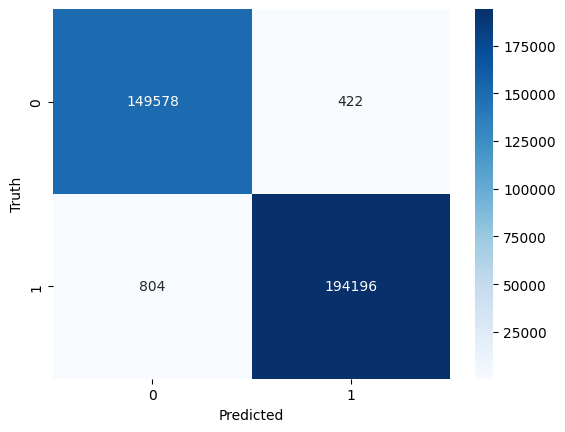

In [12]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix
import warnings

warnings.filterwarnings('ignore')

# Create a logistic regression model
model = LogisticRegression()

# Train the model
model.fit(X_train, y_train)

# Predict classes on the validation set
y_pred = model.predict(X_val)

# Compute the accuracy
accuracy = accuracy_score(y_val, y_pred)

# Compute the confusion matrix
cm = confusion_matrix(y_val, y_pred)

print(f'Accuracy: {accuracy*100:.6f}%')

# Create a heatmap for the confusion matrix
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.show()

### Logistic Regression - Using Grid Search for better hyperparameters

In [13]:
from sklearn.model_selection import GridSearchCV

model = LogisticRegression()

# https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html
# Some penalties may not work with some solvers, that's why we choose a few parameters only.
# Also: Higher number of params, higher wait.
param_grid = {
    'C': [0.1, 1, 10],
    'solver': ['newton-cg', 'lbfgs', 'sag', 'saga']
}

# GridSearchCV object
# https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5)

# Fit using Grid search
grid_search.fit(X_train, y_train)

# Get best hyperparameters and the best score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

# Get the best model generated
best_model = grid_search.best_estimator_

print("Best Hyperparameters: ", best_params)
print("Best score: ", best_score)
print("Best model (ready to use for predict): ", best_model)

Best Hyperparameters:  {'C': 10, 'solver': 'sag'}
Best score:  0.9966229813664595
Best model (ready to use for predict):  LogisticRegression(C=10, solver='sag')


In [14]:
# TDB: Implementar un predict al modelo si es necesario, usando el validation y test set.
# Recordar que GridSearchCV hace su propio cross validation solo con el train set en este caso.
# Otra opcion puede ser entrenarlo directamente con X, y, sin usar cross validation ya que lo hace internamente.

### Support Vector Machine - Raw

Accuracy: 99.643768%


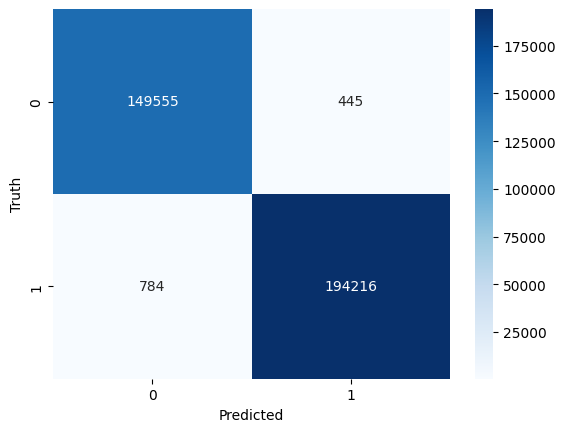

In [15]:
from sklearn.svm import SVC

# Create a SVM model
model = SVC(C=1.0, kernel='linear')

# Train the model
model.fit(X_train, y_train)

# Predict classes on the validation set
y_pred = model.predict(X_val)

# Compute the accuracy
accuracy = accuracy_score(y_val, y_pred)

# Compute the confusion matrix
cm = confusion_matrix(y_val, y_pred)

print(f'Accuracy: {accuracy*100:.6f}%')

# Create a heatmap for the confusion matrix
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.show()

### Support Vector Machine - Using Grid Search for better hyperparameters

In [ ]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid to search
# https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html
param_grid = {'C': [0.1, 1, 10], 
              'kernel': ['linear', 'rbf', 'sigmoid'],
}

# Create the SVM model
svm = SVC()

# Create the GridSearchCV object
grid_search = GridSearchCV(estimator=svm, param_grid=param_grid, cv=5)

# Fit the data to the GridSearchCV object
grid_search.fit(X_train, y_train)

# Get best hyperparameters and the best score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

# Get the best model generated
best_model = grid_search.best_estimator_

print("Best Hyperparameters: ", best_params)
print("Best score: ", best_score)
print("Best model (ready to use for predict): ", best_model)

### KNN - Raw

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

# Create a KNN classifier
knn = KNeighborsClassifier(n_neighbors=13, metric='euclidean', weights='uniform')

# Train the classifier
knn.fit(X_train, y_train)

# Make predictions on the validation data
y_pred = knn.predict(X_val)

# Compute the accuracy
accuracy = accuracy_score(y_val, y_pred)

# Compute the confusion matrix
cm = confusion_matrix(y_val, y_pred)

print(f'Accuracy: {accuracy*100:.6f}%')

# Create a heatmap for the confusion matrix
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.show()

### KNN - Using Grid Search for better hyperparameters

In [ ]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid to search
param_grid = {'n_neighbors': [3, 5, 7, 9],
              'weights': ['uniform', 'distance'],
              'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
              'p': [1, 2]}

# Create the KNN model
knn = KNeighborsClassifier()

# Create the GridSearchCV object
grid_search = GridSearchCV(estimator=knn, param_grid=param_grid, cv=5, verbose=2, n_jobs=-1)

# Fit the data to the GridSearchCV object
grid_search.fit(X_train, y_train)

# Get best hyperparameters and the best score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

# Get the best model generated
best_model = grid_search.best_estimator_

print("Best Hyperparameters: ", best_params)
print("Best score: ", best_score)
print("Best model (ready to use for predict): ", best_model)

### XGBoost - Raw

In [ ]:
from xgboost import XGBClassifier

# Create a XGBoost model
model = XGBClassifier(use_label_encoder=False, eval_metric='logloss')

# Train the model
model.fit(X_train, y_train)

# Predict classes on the validation set
y_pred = model.predict(X_val)

# Compute the accuracy
accuracy = accuracy_score(y_val, y_pred)

# Compute the confusion matrix
cm = confusion_matrix(y_val, y_pred)

print(f'Accuracy: {accuracy*100:.6f}%')

# Create a heatmap for the confusion matrix
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.show()

### XGBoost - Using Grid Search for better hyperparameters

In [ ]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid to search
param_grid = {
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7],
    'min_child_weight': [1, 3, 5],
    'subsample': [0.5, 0.7, 1.0],
    'colsample_bytree': [0.5, 0.7, 1.0],
    'n_estimators': [100, 200, 300]
}

# Create the XGBoost model
xgb_model = xgb.XGBClassifier()

# Create the GridSearchCV object
grid_search = GridSearchCV(estimator=xgb_model, param_grid=param_grid, cv=5, verbose=2, n_jobs=-1)

# Fit the data to the GridSearchCV object
grid_search.fit(X_train, y_train)

# Get best hyperparameters and the best score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

# Get the best model generated
best_model = grid_search.best_estimator_

print("Best Hyperparameters: ", best_params)
print("Best score: ", best_score)
print("Best model (ready to use for predict): ", best_model)

## Feature importance

In [ ]:
import numpy as np

# Obtain the features importances
importances = model.feature_importances_

# Name of the features
feature_names = X.columns

# List of tuples of (name, importance)
features_and_importances = zip(feature_names, importances)

# Order the list
sorted_features_and_importances = sorted(features_and_importances, key=lambda x: x[1], reverse=True)

# Print the importance of each feature
for feature, importance in sorted_features_and_importances:
    print(f"Feature: {feature}, Importance: {importance}")

In [ ]:
# Next step: Remove columns with low importance
#df = df.drop(columns=columns_to_remove)